In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.axes import Axes as ax

import sklearn
from sklearn.model_selection import train_test_split

In [2]:
fifa = pd.read_csv('/work/players_fifa23.csv')
print(fifa.shape)
fifa

(18539, 90)


,ID,Name,FullName,Age,Height,Weight,PhotoUrl,Nationality,Overall,Potential,...,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating
0,158023,L. Messi,Lionel Messi,35,169,67,https://cdn.sofifa.net/players/158/023/23_60.png,Argentina,91,91,...,91,88,91,67,66,67,62,53,62,22
1,165153,K. Benzema,Karim Benzema,34,185,81,https://cdn.sofifa.net/players/165/153/23_60.png,France,91,91,...,89,84,89,67,67,67,63,58,63,21
2,188545,R. Lewandowski,Robert Lewandowski,33,185,81,https://cdn.sofifa.net/players/188/545/23_60.png,Poland,91,91,...,86,83,86,67,69,67,64,63,64,22
3,192985,K. De Bruyne,Kevin De Bruyne,31,181,70,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,91,91,...,91,91,91,82,82,82,78,72,78,24
4,231747,K. Mbappé,Kylian Mbappé,23,182,73,https://cdn.sofifa.net/players/231/747/23_60.png,France,91,95,...,92,84,92,70,66,70,66,57,66,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,243725,D. Collins,Darren Collins,21,174,68,https://cdn.sofifa.net/players/243/725/23_60.png,Republic of Ireland,47,56,...,50,44,50,41,38,41,40,36,40,15
18535,261933,Yang Dejiang,Dejiang Yang,17,175,60,https://cdn.sofifa.net/players/261/933/23_60.png,China PR,47,57,...,45,45,45,47,48,47,49,49,49,15
18536,267823,L. Mullan,Liam Mullan,18,170,65,https://cdn.sofifa.net/players/267/823/23_60.png,Northern Ireland,47,67,...,52,49,52,46,44,46,46,42,46,17
18537,267824,D. McCallion,Daithí McCallion,17,178,65,https://cdn.sofifa.net/players/267/824/23_60.png,Republic of Ireland,47,61,...,33,33,33,44,42,44,47,49,47,15


**Data Cleaning**

In [3]:
fifa['Age'].fillna(fifa['Age'].mean(), inplace = True)
fifa['Height'].fillna(fifa['Height'].mean(), inplace = True)
fifa['Weight'].fillna(fifa['Weight'].mean(), inplace = True)
fifa['ValueEUR'].fillna(fifa['ValueEUR'].mean(), inplace = True)
fifa['WageEUR'].fillna(fifa['WageEUR'].mean(), inplace = True)
fifa['ReleaseClause'].fillna(fifa['ReleaseClause'].mean(), inplace = True)

fifa['Crossing'].fillna(fifa['Crossing'].mean(), inplace = True)
fifa['Finishing'].fillna(fifa['Finishing'].mean(), inplace = True)
fifa['HeadingAccuracy'].fillna(fifa['HeadingAccuracy'].mean(), inplace = True)
fifa['ShortPassing'].fillna(fifa['ShortPassing'].mean(), inplace = True)
fifa['Volleys'].fillna(fifa['Volleys'].mean(), inplace = True)
fifa['Dribbling'].fillna(fifa['Dribbling'].mean(), inplace = True)
fifa['Curve'].fillna(fifa['Curve'].mean(), inplace = True) 
fifa['FKAccuracy'].fillna(fifa['FKAccuracy'].mean(), inplace = True)
fifa['LongPassing'].fillna(fifa['LongPassing'].mean(), inplace = True)
fifa['BallControl'].fillna(fifa['BallControl'].mean(), inplace = True)
fifa['Acceleration'].fillna(fifa['Acceleration'].mean(), inplace = True)
fifa['SprintSpeed'].fillna(fifa['SprintSpeed'].mean(), inplace = True)
fifa['Agility'].fillna(fifa['Agility'].mean(), inplace = True)
fifa['Reactions'].fillna(fifa['Reactions'].mean(), inplace = True)
fifa['Balance'].fillna(fifa['Balance'].mean(), inplace = True)
fifa['ShotPower'].fillna(fifa['ShotPower'].mean(), inplace = True)
fifa['Jumping'].fillna(fifa['Jumping'].mean(), inplace = True)
fifa['Stamina'].fillna(fifa['Stamina'].mean(), inplace = True)
fifa['Strength'].fillna(fifa['Strength'].mean(), inplace = True)
fifa['LongShots'].fillna(fifa['LongShots'].mean(), inplace = True)
fifa['Aggression'].fillna(fifa['Aggression'].mean(), inplace = True)
fifa['Interceptions'].fillna(fifa['Interceptions'].mean(), inplace = True)
fifa['Positioning'].fillna(fifa['Positioning'].mean(), inplace = True)
fifa['Vision'].fillna(fifa['Vision'].mean(), inplace = True)
fifa['Penalties'].fillna(fifa['Penalties'].mean(), inplace = True)
fifa['Composure'].fillna(fifa['Composure'].mean(), inplace = True)
fifa['Marking'].fillna(fifa['Marking'].mean(), inplace = True)
fifa['StandingTackle'].fillna(fifa['StandingTackle'].mean(), inplace = True)
fifa['SlidingTackle'].fillna(fifa['SlidingTackle'].mean(), inplace = True)
fifa['GKDiving'].fillna(fifa['GKDiving'].mean(), inplace = True)
fifa['GKHandling'].fillna(fifa['GKHandling'].mean(), inplace = True)
fifa['GKKicking'].fillna(fifa['GKKicking'].mean(), inplace = True)
fifa['GKPositioning'].fillna(fifa['GKPositioning'].mean(), inplace = True)
fifa['GKReflexes'].fillna(fifa['GKReflexes'].mean(), inplace = True)

In [4]:
fifa['PreferredFoot'].fillna('Right', inplace = True)

In [5]:


df_1 = _deepnote_execute_sql("""
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_1

In [6]:
columns = fifa.columns
corr_list = []
column_needed = []
y = fifa['ValueEUR']
for col in columns:
    if type(fifa[col][0]) == np.int64:
        corr = np.corrcoef(fifa[col], y)
        corr_list.append(np.round(corr[0][1], 3))
        column_needed.append(col)
data = {"Column": column_needed, "Correlation Score": corr_list}
correlation_score = pd.DataFrame(data)
correlation_score

,Column,Correlation Score
0,ID,-0.234
1,Age,0.144
2,Height,0.025
3,Weight,0.051
4,Overall,0.599
...,...,...
68,RWBRating,0.271
69,LBRating,0.254
70,CBRating,0.230
71,RBRating,0.254


In [7]:
correlation_score[correlation_score['Correlation Score'] > 0.5]

,Column,Correlation Score
4,Overall,0.599
9,ValueEUR,0.822
10,WageEUR,1.000
11,ReleaseClause,0.792
13,IntReputation,0.630
35,Reactions,0.540


In [8]:
df_5_component = fifa[['Overall', 'ValueEUR', 'ReleaseClause', 'IntReputation', 'Reactions', 'WageEUR']]
for col in df_5_component.columns: 
    df_5_component[col] = (df_5_component[col] - np.mean(df_5_component[col])) / np.std(df_5_component[col])
df_5_component

/tmp/ipykernel_357/1067587896.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_5_component[col] = (df_5_component[col] - np.mean(df_5_component[col])) / np.std(df_5_component[col])


,Overall,ValueEUR,ReleaseClause,IntReputation,Reactions,WageEUR
0,3.704674,6.696143,6.462694,10.909451,3.422159,9.567081
1,3.704674,8.005914,8.596061,8.121945,3.422159,22.670880
2,3.704674,10.625456,11.390569,10.909451,3.534518,21.129256
3,3.704674,13.703418,13.210406,8.121945,3.309800,17.532135
4,3.704674,24.574516,24.647438,8.121945,3.534518,11.365642
...,...,...,...,...,...,...
18534,-2.777191,-0.362212,-0.333207,-0.240574,-1.971064,-0.427777
18535,-2.777191,-0.364832,-0.335592,-0.240574,-1.184553,-0.427777
18536,-2.777191,-0.359593,-0.323733,-0.240574,-1.409270,-0.427777
18537,-2.777191,-0.363522,-0.331503,-0.240574,-2.083423,-0.427777


In [9]:
df = fifa[['Overall', 'ValueEUR', 'ReleaseClause', 'IntReputation', 'Reactions', 'WageEUR']]
training, testing = train_test_split(df, test_size=0.2, random_state=41)
x_train = training[['Overall', 'ValueEUR', 'ReleaseClause', 'IntReputation', 'Reactions']]
y_train = training[['WageEUR']]
x_test = testing[['Overall', 'ValueEUR', 'ReleaseClause', 'IntReputation', 'Reactions']]
y_test = testing[['WageEUR']]


In [10]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(x_train, y_train)
#model.predict(x_test)
model.score(x_train, y_train), model.score(x_test, y_test)


(0.7290636323729158, 0.7389164284856372)

In [11]:
df = fifa[['Overall', 'ValueEUR', 'ReleaseClause', 'IntReputation', 'Reactions', 'WageEUR', 'Potential']]
training, testing = train_test_split(df, test_size=0.2, random_state=41)
x_train = training[['Overall', 'WageEUR', 'ReleaseClause', 'IntReputation', 'Reactions', 'Potential']]
y_train = training[['ValueEUR']]
x_test = testing[['Overall', 'WageEUR', 'ReleaseClause', 'IntReputation', 'Reactions', 'Potential']]
y_test = testing[['ValueEUR']]


In [12]:
lm = LinearRegression()
model = lm.fit(x_train, y_train)
#model.predict(x_test)
model.score(x_train, y_train), model.score(x_test, y_test)

(0.9609373695365936, 0.960794002295895)

<AxesSubplot: xlabel='Age', ylabel='ValueEUR'>

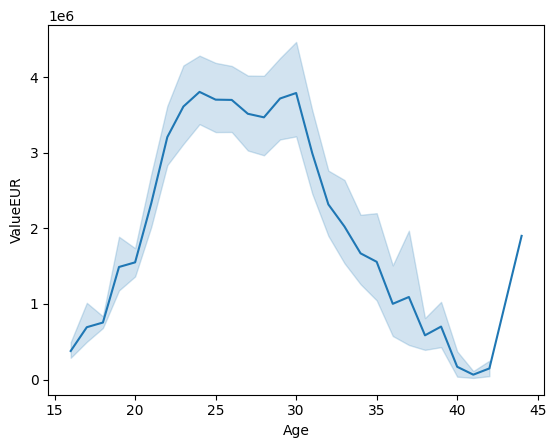

In [13]:
sns.lineplot(x='Age',y='ValueEUR',data=fifa)

In [14]:
#age
def under_30(df):
    return (df['Age']<30)
temp = pd.get_dummies(under_30(fifa))
fifa['under_30'],fifa['above_30'] = temp.iloc[:,1],temp.iloc[:,0]

In [15]:
fifa['Age under 30'] = fifa['under_30']*fifa['Age']
fifa['Age above 30'] = fifa['above_30']*fifa['Age']
fifa[['Overall', 'ValueEUR', 'IntReputation', 'Reactions', 'WageEUR','Age under 30','Age above 30']]

,Overall,ValueEUR,IntReputation,Reactions,WageEUR,Age under 30,Age above 30
0,91,54000000,5,92,195000,0,35
1,91,64000000,4,92,450000,0,34
2,91,84000000,5,93,420000,0,33
3,91,107500000,4,91,350000,0,31
4,91,190500000,4,93,230000,23,0
...,...,...,...,...,...,...,...
18534,47,110000,1,44,500,21,0
18535,47,90000,1,51,500,17,0
18536,47,130000,1,49,500,18,0
18537,47,100000,1,43,500,17,0


In [16]:
# contract length
def contract_len(df):
    return df['ContractUntil']-df['ClubJoined']
fifa['ContractLen'] = contract_len(fifa)
#fifa[['Overall', 'ValueEUR', 'IntReputation', 'Reactions', 'WageEUR','Age under 30','Age above 30',
#'ContractLen']]

<AxesSubplot: xlabel='ContractLen', ylabel='ValueEUR'>

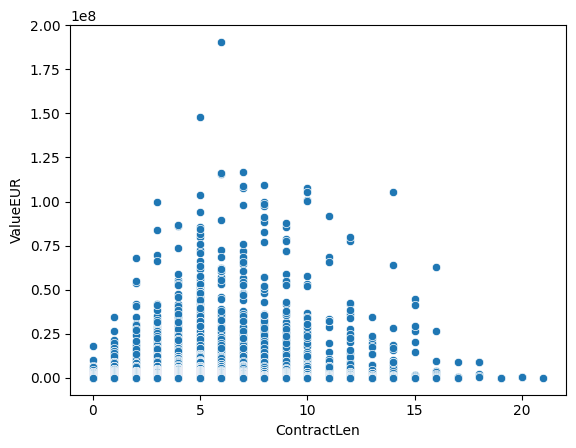

In [17]:
sns.scatterplot(x='ContractLen',y='ValueEUR',data=fifa)

<AxesSubplot: xlabel='ClubPosition', ylabel='ValueEUR'>

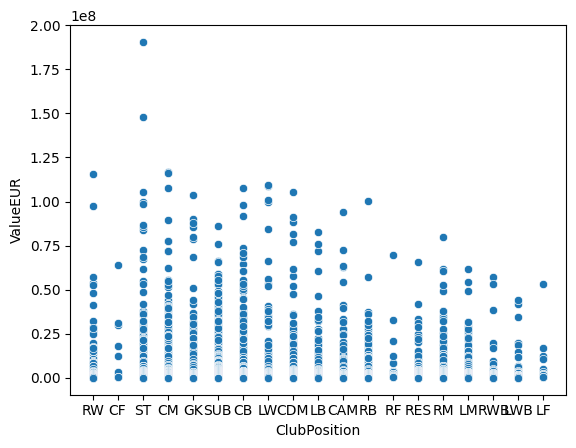

In [18]:
# club position
sns.scatterplot(x='ClubPosition',y='ValueEUR',data=fifa)

In [19]:
# club position
pd.get_dummies(fifa[['Overall', 'ValueEUR', 'IntReputation', 'WageEUR','Age under 30','Age above 30',
'ContractLen','ClubPosition']])

,Overall,ValueEUR,IntReputation,WageEUR,Age under 30,Age above 30,ContractLen,ClubPosition_CAM,ClubPosition_CB,ClubPosition_CDM,...,ClubPosition_LW,ClubPosition_LWB,ClubPosition_RB,ClubPosition_RES,ClubPosition_RF,ClubPosition_RM,ClubPosition_RW,ClubPosition_RWB,ClubPosition_ST,ClubPosition_SUB
0,91,54000000,5,195000,0,35,2.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,91,64000000,4,450000,0,34,14.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,91,84000000,5,420000,0,33,3.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,91,107500000,4,350000,0,31,10.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,91,190500000,4,230000,23,0,6.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,47,110000,1,500,21,0,4.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
18535,47,90000,1,500,17,0,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18536,47,130000,1,500,18,0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18537,47,100000,1,500,17,0,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


<AxesSubplot: xlabel='ContractLen', ylabel='ValueEUR'>

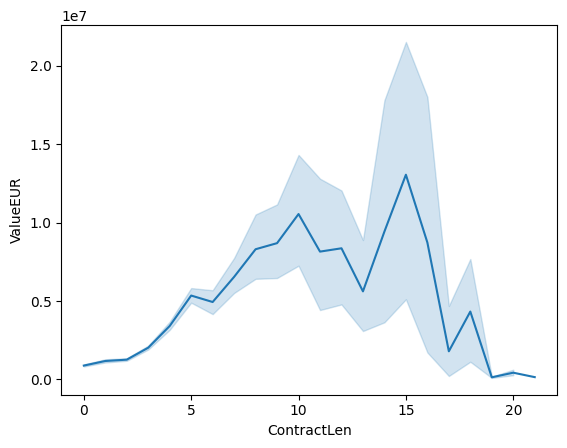

In [65]:
sns.lineplot(x='ContractLen',y='ValueEUR',data=fifa)

<AxesSubplot: xlabel='PassingTotal', ylabel='ValueEUR'>

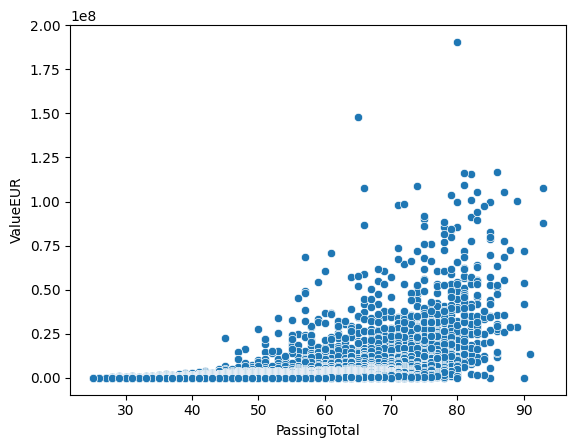

In [21]:
sns.scatterplot(x='PassingTotal',y='ValueEUR',data=fifa)

In [22]:
fifa['log ShootingTotal'] = np.log(fifa['ShootingTotal'])
fifa['log PassingTotal'] = np.log(fifa['PassingTotal'])
fifa['log DribblingTotal'] = np.log(fifa['DribblingTotal'])
fifa['log DefendingTotal'] = np.log(fifa['DefendingTotal'])
fifa['log HeadingAccuracy'] = np.log(fifa['HeadingAccuracy'])


df = pd.get_dummies(fifa[['Overall', 'ValueEUR', 'WageEUR', 'IntReputation','Age under 30','Age above 30',
'ContractLen','log ShootingTotal','log PassingTotal', 'log DribblingTotal',
'log DefendingTotal','log HeadingAccuracy', 'Potential']])

In [23]:
df = df.dropna()
training, testing = train_test_split(df, test_size=0.2, random_state=41)
x_train = training.drop(labels='ValueEUR',axis=1)
y_train = training[['ValueEUR']]
x_test = testing.drop(labels='ValueEUR',axis=1)
y_test = testing[['ValueEUR']]

In [24]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(x_train, y_train)
#model.predict(x_test)
model.score(x_train, y_train), model.score(x_test, y_test)

(0.7193943622951458, 0.6907708652006501)

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(x_train, y_train)
rf.score(x_train, y_train), rf.score(x_test, y_test)

/tmp/ipykernel_357/214703942.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


(0.9965253021746967, 0.9889115417496892)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.ensemble import StackingRegressor

model_1 = LinearRegression()
model_3 = RandomForestRegressor(n_estimators=100, random_state=42)
model_4 = MLPRegressor(activation='logistic', hidden_layer_sizes=10, max_iter=50, random_state=42)
model_5 = DecisionTreeRegressor(max_depth=1, max_features='auto', random_state=42)
model_6 = KNeighborsRegressor(n_neighbors=5)
model_9 = GradientBoostingRegressor(learning_rate=0.1)

# Making the final model using voting classifier
final_model = StackingRegressor(estimators=[('lg', model_1), ('rf', model_3), ('mlp', model_4), ('dt', model_5),
                 ('knn', model_6), ('gb', model_9)])
 
# training all the model on the train dataset
final_model.fit(x_train, y_train)
pred_train = final_model.predict(x_test)
final_model.score(x_train, y_train), final_model.score(x_test, y_test)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/ensemble/_stacking.py:865: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet

(-155743.90468626542, -149142.80132752514)

In [ ]:
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor

final_layer_rfr = RandomForestRegressor(n_estimators=10, max_features=1, max_leaf_nodes=5,random_state=42)
final_layer_gbr = GradientBoostingRegressor(n_estimators=10, max_features=1, max_leaf_nodes=5,random_state=42)
final_layer = StackingRegressor(estimators=[('rf', final_layer_rfr), ('gbrt', final_layer_gbr)], final_estimator=RidgeCV())
multi_layer_regressor = StackingRegressor(
        estimators=[('ridge', RidgeCV()),
                   ('lasso', LassoCV(random_state=42)),
                   ('knr', KNeighborsRegressor(n_neighbors=20,
                                              metric='euclidean'))],
       final_estimator=final_layer
    )
multi_layer_regressor.fit(x_train, y_train)
multi_layer_regressor.score(x_test, y_test)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/ensemble/_stacking.py:865: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-1009229.8596468542

In [61]:
from sklearn.svm import LinearSVR

model_1 = LinearRegression()
model_3 = RandomForestRegressor(n_estimators=100, random_state=42)
model_4 = MLPRegressor(activation='relu', hidden_layer_sizes=10, max_iter=50, random_state=42)
model_5 = DecisionTreeRegressor(max_depth=1, max_features='auto', random_state=42)
model_6 = KNeighborsRegressor(n_neighbors=5)
model_9 = GradientBoostingRegressor(learning_rate=0.1, random_state=42)

estimators = [('lrr', RidgeCV()), ('lasso', LassoCV(random_state=42)), 
                ('lr', model_1), ('rf', model_3), ('mlp', model_4), ('dt', model_5),
                ('gb', model_9)]
reg = StackingRegressor(estimators=estimators, final_estimator=RandomForestRegressor(n_estimators=10))
reg.fit(x_train, y_train)
reg.score(x_test, y_test)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/ensemble/_stacking.py:865: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet

0.9906036511017854

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cc80a5ab-5a4e-4539-9976-15d1bdddd134' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>